In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [10]:
#import tweepy
#from textblob import TextBlob
#from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#import snscrape.modules.twitter as sntwitter
#import string

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import random
from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve,roc_curve,precision_score,recall_score,accuracy_score,classification_report
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from google.colab import drive
import seaborn as sn



plt.style.use('fivethirtyeight')

In [31]:
#importing dataset on 19 june 2022
#drive.mount('/content/drive')
#train = pd.read_csv('/content/drive/My Drive/SentimentAnalysis/training_dataset.csv')
#test = pd.read_csv('/content/drive/My Drive/SentimentAnalysis/testing_dataset.csv')
dataset=pd.read_csv('dataset.csv')

#print(train.shape)
#print(test.shape)
print(dataset.shape)

(11250, 8)


In [4]:
# Renaming 1st column to "tweet_num"
#train=train.rename(columns={test.columns[0]: 'Tweet_num'})
#test=test.rename(columns={test.columns[0]: 'Tweet_num'})
dataset=dataset.rename(columns={dataset.columns[0]: 'Tweet_num'})

In [5]:
dataset

,Tweet_num,Date,User,Tweet,Subjectivity,Polarity,Analysis,Label
0,0,2022-06-19 14:39:17+00:00,SuganthanRamak1,for gods sake its their choice putin on ukrain...,0.000000,0.000000,Neutral,2
1,1,2022-06-19 14:38:45+00:00,WilsonShilo,the eu warn that russian action in russiaukrai...,0.050000,0.050000,Positive,1
2,3,2022-06-19 14:37:19+00:00,NasticInc,a russian plane crash near chernihiv ukraine r...,0.133333,0.033333,Positive,1
3,6,2022-06-19 14:35:51+00:00,NasticInc,terror attack catch on cctv footage standwithu...,0.000000,0.000000,Neutral,2
4,7,2022-06-19 14:35:23+00:00,NasticInc,a russian ship burn at port of berdyansk ukrai...,0.000000,0.000000,Neutral,2
...,...,...,...,...,...,...,...,...
11245,24994,2022-05-27 00:11:50+00:00,ichbin_ironhill,russia doesnt kill the 5000 ukrainian pows ukr...,0.333333,0.200000,Positive,1
11246,24995,2022-05-27 00:04:53+00:00,RusskieUkraine,insane footage from ukraine us and uk foreign ...,0.545000,-0.265000,Negative,0
11247,24996,2022-05-27 00:03:51+00:00,Globallpolitics,obesity be the second lead cause of death in t...,0.000000,0.000000,Neutral,2
11248,24997,2022-05-27 00:01:02+00:00,Globallpolitics,list of 6 anti agingfood usa china food antiag...,0.000000,0.000000,Neutral,2


In [6]:
#train.head()

In [7]:
#test.head()

In [8]:
#train.isnull().any()
#test.isnull().any()

In [9]:
# checking out the negative comments from the train set

#train[train['Label'] == 0].head(10)

In [10]:
# checking out the postive comments from the train set 

#train[train['Label'] == 1].head(10)

In [11]:
#train['Label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [12]:

# checking the distribution of tweets in the data

#length_train = train['Tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
#length_test = test['Tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

#train['Len'] = train['Tweet'].str.len()
#test['Len'] = test['Tweet'].str.len()

#train.head(10)

In [14]:

#train.groupby('Label').describe()


In [15]:


#train.groupby('Len').mean()['Label'].plot.hist(color = 'black', figsize = (6, 4),)
#plt.title('variation of length')
#plt.xlabel('Length')
#plt.show()



# 5. Data Modelling

Feature Extraction

In [16]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
dataset_corpus = []

for i in range(0, 11250):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  dataset_corpus.append(review)



In [18]:
len(dataset_corpus)

11250

In [19]:
#deletable


In [20]:
dataset

,Tweet_num,Date,User,Tweet,Subjectivity,Polarity,Analysis,Label
0,0,2022-06-19 14:39:17+00:00,SuganthanRamak1,for gods sake its their choice putin on ukrain...,0.000000,0.000000,Neutral,2
1,1,2022-06-19 14:38:45+00:00,WilsonShilo,the eu warn that russian action in russiaukrai...,0.050000,0.050000,Positive,1
2,3,2022-06-19 14:37:19+00:00,NasticInc,a russian plane crash near chernihiv ukraine r...,0.133333,0.033333,Positive,1
3,6,2022-06-19 14:35:51+00:00,NasticInc,terror attack catch on cctv footage standwithu...,0.000000,0.000000,Neutral,2
4,7,2022-06-19 14:35:23+00:00,NasticInc,a russian ship burn at port of berdyansk ukrai...,0.000000,0.000000,Neutral,2
...,...,...,...,...,...,...,...,...
11245,24994,2022-05-27 00:11:50+00:00,ichbin_ironhill,russia doesnt kill the 5000 ukrainian pows ukr...,0.333333,0.200000,Positive,1
11246,24995,2022-05-27 00:04:53+00:00,RusskieUkraine,insane footage from ukraine us and uk foreign ...,0.545000,-0.265000,Negative,0
11247,24996,2022-05-27 00:03:51+00:00,Globallpolitics,obesity be the second lead cause of death in t...,0.000000,0.000000,Neutral,2
11248,24997,2022-05-27 00:01:02+00:00,Globallpolitics,list of 6 anti agingfood usa china food antiag...,0.000000,0.000000,Neutral,2


In [21]:
Y = dataset.iloc[:, 7]
print(Y.shape)

(11250,)


**5.1 MODEL-1 : Bag of Words Model**

It is a simplifying representation used in natural language procesing and information retrieval. This model is commonly used in methods of document classification where the (frequency of) occurence of each word is used as a feature for training a classifier.

In [22]:
#dcorp=dataset['Tweet'].toarray()

In [423]:
cv = CountVectorizer(ngram_range=(1,1), analyzer='word',min_df=10)
#ngram_range=(1,1), analyzer='word',min_df=10
X1 = cv.fit_transform(dataset_corpus)

print('Shape of Data Matrix for Bag of words model: ', X1.shape)
print(list(random.sample(list(cv.get_feature_names_out()),10)))

Shape of Data Matrix for Bag of words model:  (11250, 2198)
['blinken', 'thread', 'particip', 'lose', 'actual', 'blind', 'prolong', 'tabl', 'stato', 'war']


In [395]:
#print(X1.toarray())

**5.2 MODEL-2 : N-gram Model**

It can be defined as the contiguous sequence of 'n' items from a given sample of text. this model will predict the probability of a given n-gram within any sequesce of words in the language

In [530]:
cv = CountVectorizer(ngram_range=(2,2), analyzer='word', min_df=10)
X2 = cv.fit_transform(dataset_corpus)
print('Shape of Data Matrix for N-gram model(n=2): ', X2.shape)
print(random.sample(list(cv.get_feature_names_out()), 10))

Shape of Data Matrix for N-gram model(n=2):  (11250, 1070)
['close record', 'packag sanction', 'russiaukrainewar ukrainerussianwar', 'ukrainewar ukrainewar', 'fight russia', 'russia war', 'russia occupi', 'russiagohom ukrainian', 'rut dax', 'help ukrain']


In [531]:
print(X2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**5.3 MODEL-3 : TF-IDF Model**

*Term frequency-inverse document frequency*

unlike ,bag of words, tf-idf creates a normal count where each word count is divided by the number of document this word appears in

In [398]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=10)
#analyzer='word', ngram_range=(1,1), min_df=10
X3 = tfidf.fit_transform(dataset_corpus)
print('Shape of Data Matrix for TF-IDF model: ', X3.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF model:  (11250, 2198)
['us', 'trade', 'closer', 'paes', 'btr', 'ive', 'assault', 'breach', 'nd', 'renewableenergi']


**5.4 MODEL-4 : TF-IDF N-gram Model**

In [399]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df=10)
X4 = tfidf.fit_transform(dataset_corpus)
print('Shape of Data Matrix for TF-IDF N-gram model(n=2): ', X4.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF N-gram model(n=2):  (11250, 1070)
['port berdyansk', 'nazi ukrain', 'russiaukrainewar news', 'warcrim ukrainewarcrim', 'oil import', 'kill ukrainian', 'russiaukrainewar russianukrainianwar', 'ukrain war', 'internationalnew russiaukrainewar', 'ukrainian ukrainerussianwar']


**5.5 MODEL-5 : TF-IDF with mixture of N-Gram**

In [400]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=20)
X5 = tfidf.fit_transform(dataset_corpus)
print('Shape of Data Matrix for TF-IDF and mixture of N-gram model(n=1,2,3): ', X5.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF and mixture of N-gram model(n=1,2,3):  (11250, 1963)
['put', 'brigad', 'lavrov', 'standwithukrain russiaukrainewar', 'point', 'build', 'unitedn', 'recov russian', 'ukrain standwithukrain russia', 'wake']


## **Splitting the data into train and testing sets**

In [401]:
print(X1.shape)
print(Y.shape)

(11250, 2198)
(11250,)


In [532]:
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X2,Y, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7875, 1070)
(3375, 1070)
(7875,)
(3375,)


In [533]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# **Machine Learning Model**

**Model-1 : Random Forest**

In [534]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred,pos_label='positive',average='macro'))

#Calculating Precision and Recall Score
print('Accuracy: ', accuracy_score(y_test, y_pred))
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



Training Accuracy : 0.8191746031746032
Validation Accuracy : 0.5223703703703704
F1 score : 0.47045472089825235
Accuracy:  0.5223703703703704
Precision Score:  0.4890525282832175
Recall Score:  0.4687195603802306
[[ 209  168  322]
 [ 154  431  540]
 [ 140  288 1123]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [535]:
Model_Accuracy=[]
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704]


In [536]:
y_pred

array([2, 0, 2, ..., 1, 0, 2], dtype=int64)

In [537]:
confusion_M1=pd.crosstab(y_test,y_pred)
confusion_M1

col_0,0,1,2
Label,,,
0,209,168,322
1,154,431,540
2,140,288,1123


In [538]:
#sum of diagonoals
#np.diag(confusion_M1).sum()

#accuracy
np.diag(confusion_M1).sum()/confusion_M1.sum().sum()

0.5223703703703704

**Scores for class 0**

In [539]:
TP=confusion_M1.iloc[0,0].sum()
TP

209

In [540]:
FP=confusion_M1.iloc[0,:].sum()-TP
FP

490

In [541]:
FN=confusion_M1.iloc[:,0].sum()-TP
FN

294

In [542]:
TN=confusion_M1.sum().sum()-TP-FP-FN
TN

2382

In [543]:
#Find out accuracy of Every Single class
#Accuracy for class 0
Accuracy_class0=(TP+TN)/confusion_M1.sum().sum()
Accuracy_class0

0.7677037037037037

In [544]:
precision_class0=TP/(TP+FP)
precision_class0

0.2989985693848355

In [545]:
Recall_class0=TP/(TP+FN)
Recall_class0

0.415506958250497

In [546]:
F1_Class0=(2*precision_class0*Recall_class0)/(precision_class0+Recall_class0)
F1_Class0

0.3477537437603993

**Scores for class 1**

In [547]:
TP=confusion_M1.iloc[1,1].sum()
FP=confusion_M1.iloc[0,:].sum()-TP
FN=confusion_M1.iloc[:,0].sum()-TP
TN=confusion_M1.sum().sum()-TP-FP-FN

In [548]:
#Find out accuracy of Every Single class
#Accuracy for class 1
Accuracy_class1=(TP+TN)/confusion_M1.sum().sum()
precision_class1=TP/(TP+FP)
Recall_class1=TP/(TP+FN)
F1_Class1=(2*precision_class0*Recall_class0)/(precision_class0+Recall_class0)

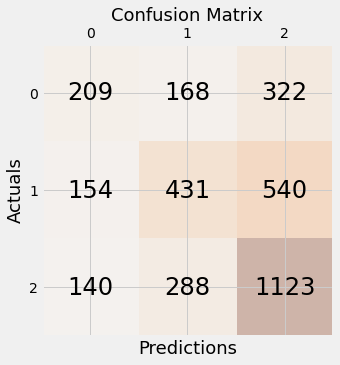

In [549]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [550]:
for i in range(confusion_M1.shape[0]):
    TP=confusion_M1.iloc[i,i].sum()
    FP=confusion_M1.iloc[i,:].sum()-TP
    FN=confusion_M1.iloc[:,i].sum()-TP
    TN=confusion_M1.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M1.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M1.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)

0 0.7677037037037037 0.2989985693848355 0.415506958250497 0.3477537437603993
1 0.6592592592592592 0.3831111111111111 0.4859075535512965 0.4284294234592445
2 0.6177777777777778 0.7240490006447453 0.565743073047859 0.6351809954751132


In [551]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2085 WP :  1290


In [552]:
RF_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
RF_Report.to_excel('N-GRAM_RF.xlsx')
RF_Report

,precision,recall,f1-score,support
0,0.415507,0.298999,0.347754,699.00000
1,0.485908,0.383111,0.428429,1125.00000
2,0.565743,0.724049,0.635181,1551.00000
accuracy,0.522370,0.522370,0.522370,0.52237
macro avg,0.489053,0.468720,0.470455,3375.00000
weighted avg,0.508016,0.522370,0.506734,3375.00000


**ROC Curve- Receiver Operating Characteristics Curve**

FPR (x-axis) TPR (y-axis)

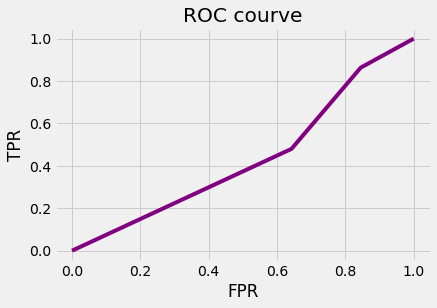

In [553]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()

**PRC Curve**

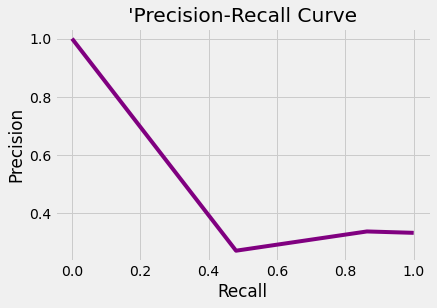

In [554]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("'Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

**Model-2 : Logistic Regression**

In [555]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) 

Training Accuracy : 0.6458412698412699
Validation Accuracy : 0.5223703703703704
f1 score : 0.5223703703703704
Precision Score:  0.5223703703703704
Recall Score:  0.5223703703703704
[[ 199  162  338]
 [ 126  418  581]
 [ 131  274 1146]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [556]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704]


**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

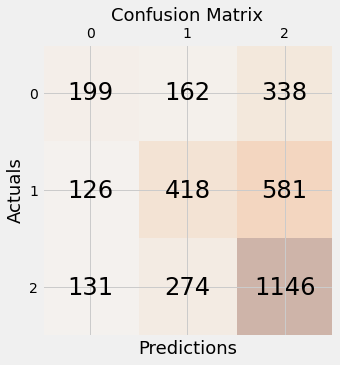

In [557]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [558]:
confusion_M2=pd.crosstab(y_test,y_pred)
confusion_M2

col_0,0,1,2
Label,,,
0,199,162,338
1,126,418,581
2,131,274,1146


**Scores for class 0,1,2 simulaneously**

In [559]:
for i in range(confusion_M2.shape[0]):
    TP=confusion_M2.iloc[i,i].sum()
    FP=confusion_M2.iloc[i,:].sum()-TP
    FN=confusion_M2.iloc[:,i].sum()-TP
    TN=confusion_M2.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M2.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M2.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)

0 0.7757037037037037 0.28469241773962806 0.43640350877192985 0.34458874458874456
1 0.6613333333333333 0.37155555555555553 0.4894613583138173 0.4224355735219808
2 0.6077037037037037 0.7388781431334622 0.5549636803874092 0.6338495575221238


In [560]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2051 WP :  1324


In [561]:
LR_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
LR_Report.to_excel('N-GRAM_LR.xlsx')
LR_Report

,precision,recall,f1-score,support
0,0.436404,0.284692,0.344589,699.00000
1,0.489461,0.371556,0.422436,1125.00000
2,0.554964,0.738878,0.633850,1551.00000
accuracy,0.522370,0.522370,0.522370,0.52237
macro avg,0.493610,0.465042,0.466958,3375.00000
weighted avg,0.508574,0.522370,0.503469,3375.00000


**ROC Curve- Receiver Operating Characteristics Curve**

FPR (x-axis) TPR (y-axis)

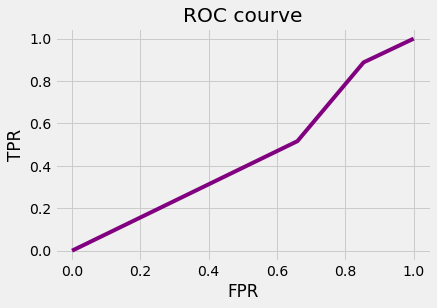

In [562]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()

**PRC Curve**

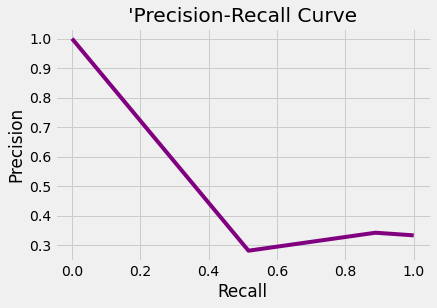

In [563]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("'Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

**Model-3 : Decision Tree**

In [564]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8191746031746032
Validation Accuracy : 0.49333333333333335
f1 score : 0.4933333333333334
Precision Score:  0.49333333333333335
Recall Score:  0.49333333333333335
[[ 243  171  285]
 [ 209  413  503]
 [ 222  320 1009]]


In [565]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335]


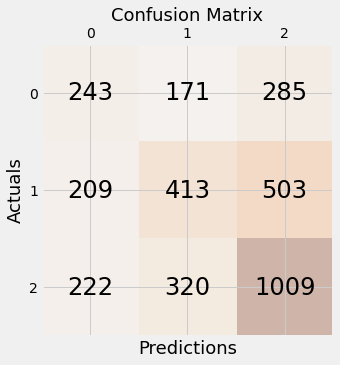

In [566]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [567]:
confusion_M3=pd.crosstab(y_test,y_pred)
confusion_M3

col_0,0,1,2
Label,,,
0,243,171,285
1,209,413,503
2,222,320,1009


**Scores for class 0,1,2 simulaneously**

In [568]:
for i in range(confusion_M3.shape[0]):
    TP=confusion_M3.iloc[i,i].sum()
    FP=confusion_M3.iloc[i,:].sum()-TP
    FN=confusion_M3.iloc[:,i].sum()-TP
    TN=confusion_M3.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M3.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M3.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)




0 0.7371851851851852 0.34763948497854075 0.36053412462908013 0.35396941005098326
1 0.6435555555555555 0.3671111111111111 0.45685840707964603 0.4070970921636274
2 0.605925925925926 0.6505480335267569 0.5614913745130774 0.6027479091995223


In [569]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2045 WP :  1330


In [570]:
DT_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
DT_Report.to_excel('N-GRAM_DT.xlsx')
DT_Report

,precision,recall,f1-score,support
0,0.360534,0.347639,0.353969,699.000000
1,0.456858,0.367111,0.407097,1125.000000
2,0.561491,0.650548,0.602748,1551.000000
accuracy,0.493333,0.493333,0.493333,0.493333
macro avg,0.459628,0.455100,0.454605,3375.000000
weighted avg,0.484993,0.493333,0.486006,3375.000000


**ROC Curve- Receiver Operating Characteristics Curve**

FPR (x-axis) TPR (y-axis)

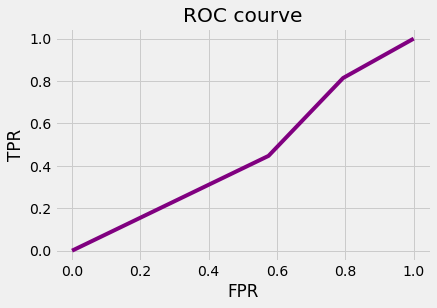

In [571]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()


**PRC Curve**

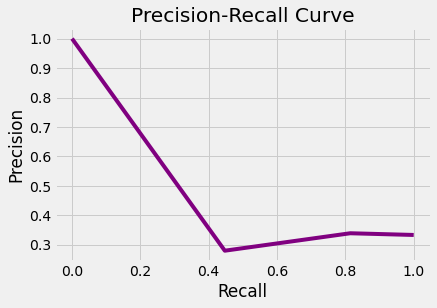

In [572]:

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

**Model-4 : support vector machines**

In [573]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.6975238095238095
Validation Accuracy : 0.5502222222222222
f1 score : 0.5502222222222222
Precision Score:  0.5502222222222222
Recall Score:  0.5502222222222222
[[ 139  140  420]
 [  56  412  657]
 [  35  210 1306]]


In [574]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222]


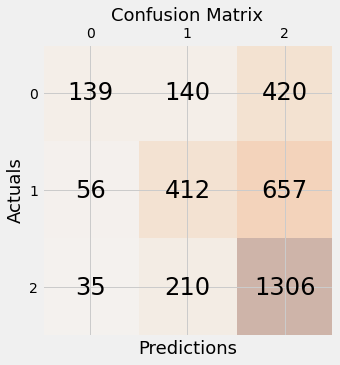

In [575]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()





In [576]:
confusion_M4=pd.crosstab(y_test,y_pred)
confusion_M4



col_0,0,1,2
Label,,,
0,139,140,420
1,56,412,657
2,35,210,1306


**Scores for class 0,1,2 simulaneously**





In [577]:
for i in range(confusion_M4.shape[0]):
    TP=confusion_M4.iloc[i,i].sum()
    FP=confusion_M4.iloc[i,:].sum()-TP
    FN=confusion_M4.iloc[:,i].sum()-TP
    TN=confusion_M4.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M4.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M4.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)




0 0.8071111111111111 0.1988555078683834 0.6043478260869565 0.2992465016146394
1 0.685037037037037 0.3662222222222222 0.5406824146981627 0.43667196608373077
2 0.6082962962962963 0.8420373952288845 0.5480486781368024 0.6639552618200304


In [578]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2053 WP :  1322


In [579]:
SVM_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
SVM_Report.to_excel('N-GRAM_SVM.xlsx')
SVM_Report

,precision,recall,f1-score,support
0,0.604348,0.198856,0.299247,699.000000
1,0.540682,0.366222,0.436672,1125.000000
2,0.548049,0.842037,0.663955,1551.000000
accuracy,0.550222,0.550222,0.550222,0.550222
macro avg,0.564360,0.469038,0.466625,3375.000000
weighted avg,0.557253,0.550222,0.512659,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**


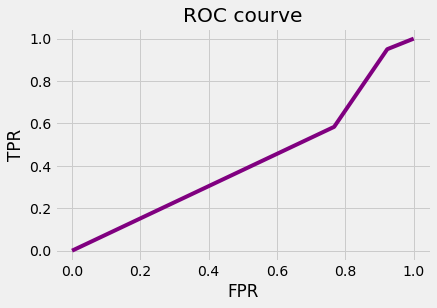

In [580]:

# FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()




**PRC Curve**



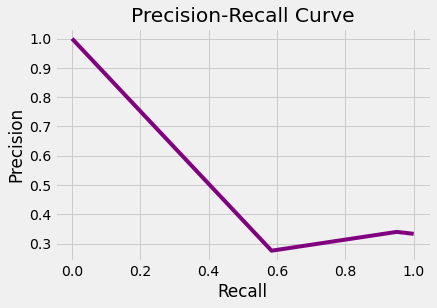

In [581]:

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

## **Model-5 : XG Boost classifier**

In [582]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.6058412698412698
Validation Accuracy : 0.5582222222222222
f1 score : 0.5582222222222222
Precision Score:  0.5582222222222222
Recall Score:  0.5582222222222222
[[ 164   69  466]
 [  55  296  774]
 [  19  108 1424]]


In [583]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222, 0.5582222222222222]


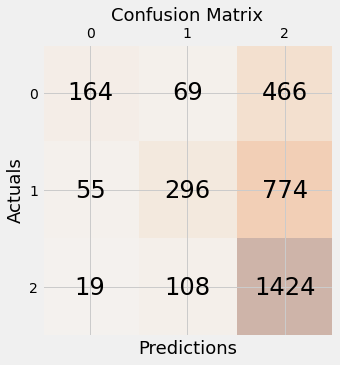

In [584]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




In [585]:

confusion_M5=pd.crosstab(y_test,y_pred)
confusion_M5


col_0,0,1,2
Label,,,
0,164,69,466
1,55,296,774
2,19,108,1424



**Scores for class 0,1,2 simulaneously**




In [586]:

for i in range(confusion_M5.shape[0]):
    TP=confusion_M5.iloc[i,i].sum()
    FP=confusion_M5.iloc[i,:].sum()-TP
    FN=confusion_M5.iloc[:,i].sum()-TP
    TN=confusion_M5.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M5.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M5.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)



0 0.8195555555555556 0.23462088698140202 0.6890756302521008 0.35005336179295626
1 0.701925925925926 0.26311111111111113 0.6257928118393234 0.3704630788485608
2 0.5949629629629629 0.9181173436492586 0.5345345345345346 0.6756820877817319


In [587]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2008 WP :  1367


In [588]:
XGB_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
XGB_Report.to_excel('N-GRAM_XGB.xlsx')
XGB_Report


,precision,recall,f1-score,support
0,0.689076,0.234621,0.350053,699.000000
1,0.625793,0.263111,0.370463,1125.000000
2,0.534535,0.918117,0.675682,1551.000000
accuracy,0.558222,0.558222,0.558222,0.558222
macro avg,0.616468,0.471950,0.465400,3375.000000
weighted avg,0.596961,0.558222,0.506501,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**



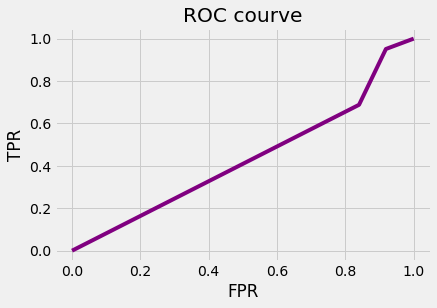

In [589]:
#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()




**PRC Curve**




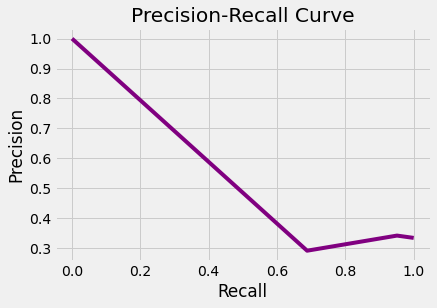

In [590]:

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**Model-6 : Gaussian Naive Bayes (GNB)**

In [591]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [592]:
model.fit(x_train.todense(), y_train)

y_pred = model.predict(x_test.todense())

print("Training Accuracy :", model.score(x_train.todense(), y_train))
print("Validation Accuracy :", model.score(x_test.todense(), y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy : 0.3980952380952381
Validation Accuracy : 0.3508148148148148
f1 score : 0.3508148148148148
Precision Score:  0.3508148148148148
Recall Score:  0.3508148148148148
[[ 633   30   36]
 [ 897  156   72]
 [1099   57  395]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [593]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222, 0.5582222222222222, 0.3508148148148148]


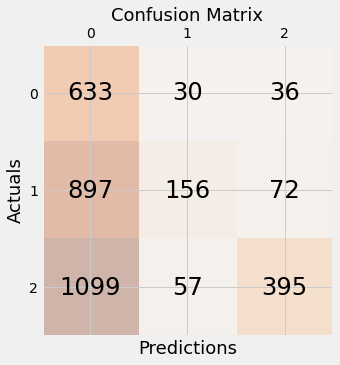

In [594]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [595]:
confusion_M6=pd.crosstab(y_test,y_pred)
confusion_M6


col_0,0,1,2
Label,,,
0,633,30,36
1,897,156,72
2,1099,57,395


In [596]:
for i in range(confusion_M6.shape[0]):
    TP=confusion_M6.iloc[i,i].sum()
    FP=confusion_M6.iloc[i,:].sum()-TP
    FN=confusion_M6.iloc[:,i].sum()-TP
    TN=confusion_M6.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M6.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M6.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)



0 0.389037037037037 0.9055793991416309 0.2407759604412324 0.3804086538461538
1 0.6871111111111111 0.13866666666666666 0.6419753086419753 0.22807017543859648
2 0.6254814814814815 0.2546744036105738 0.7852882703777336 0.3846153846153846


In [597]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2111 WP :  1264


In [598]:
GNB_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
GNB_Report.to_excel('N-GRAM_GNB.xlsx')
GNB_Report


,precision,recall,f1-score,support
0,0.240776,0.905579,0.380409,699.000000
1,0.641975,0.138667,0.228070,1125.000000
2,0.785288,0.254674,0.384615,1551.000000
accuracy,0.350815,0.350815,0.350815,0.350815
macro avg,0.556013,0.432973,0.331031,3375.000000
weighted avg,0.624743,0.350815,0.331562,3375.000000


**ROC Curve- Receiver Operating Characteristics Curve**


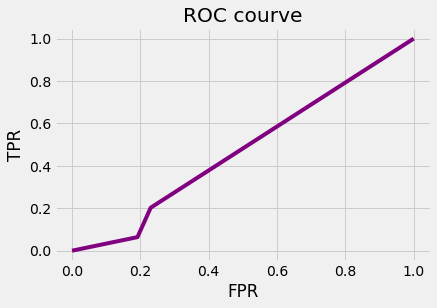

In [599]:




#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()






**PRC Curve**

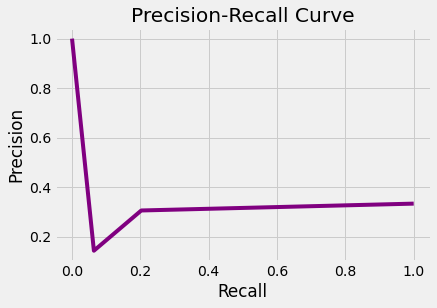

In [600]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**Model-7 : ADA boost**

In [601]:


from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()

model.fit(x_train.todense(), y_train)

y_pred = model.predict(x_test.todense())

print("Training Accuracy :", model.score(x_train.todense(), y_train))
print("Validation Accuracy :", model.score(x_test.todense(), y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy : 0.5231746031746032


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Validation Accuracy : 0.522962962962963
f1 score : 0.522962962962963
Precision Score:  0.522962962962963
Recall Score:  0.522962962962963
[[ 107   17  575]
 [  23  134  968]
 [   2   25 1524]]


In [602]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222, 0.5582222222222222, 0.3508148148148148, 0.522962962962963]


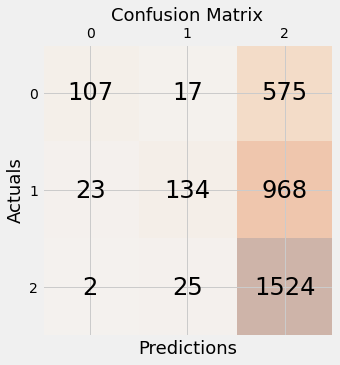

In [603]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [604]:
confusion_M7=pd.crosstab(y_test,y_pred)
confusion_M7




col_0,0,1,2
Label,,,
0,107,17,575
1,23,134,968
2,2,25,1524


In [605]:
for i in range(confusion_M7.shape[0]):
    TP=confusion_M7.iloc[i,i].sum()
    FP=confusion_M7.iloc[i,:].sum()-TP
    FN=confusion_M7.iloc[:,i].sum()-TP
    TN=confusion_M7.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M7.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M7.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)





0 0.8171851851851852 0.1530758226037196 0.8106060606060606 0.25752105896510225
1 0.693925925925926 0.11911111111111111 0.7613636363636364 0.2059953881629516
2 0.5348148148148149 0.9825918762088974 0.4969025105966743 0.6600259852750108


In [606]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  1805 WP :  1570


In [607]:
ADA_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
ADA_Report.to_excel('N-GRAM_ADA.xlsx')
ADA_Report



,precision,recall,f1-score,support
0,0.810606,0.153076,0.257521,699.000000
1,0.761364,0.119111,0.205995,1125.000000
2,0.496903,0.982592,0.660026,1551.000000
accuracy,0.522963,0.522963,0.522963,0.522963
macro avg,0.689624,0.418260,0.374514,3375.000000
weighted avg,0.650028,0.522963,0.425319,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**




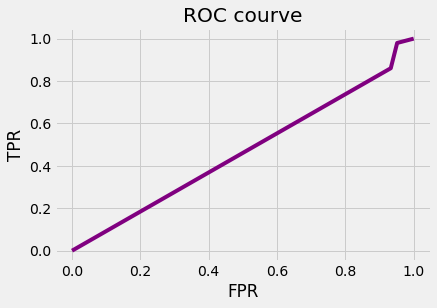

In [608]:




#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()






**PRC Curve**

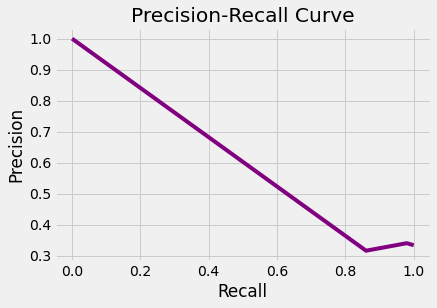

In [609]:




#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



**Model-8 : KNN**

In [610]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test.todense())

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='macro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy : 0.5897142857142857
Validation Accuracy : 0.45866666666666667
f1 score : 0.44106817980527674
Precision Score:  0.44748398379775356
Recall Score:  0.44934170979573224
[[308 190 201]
 [349 442 334]
 [419 334 798]]


In [611]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222, 0.5582222222222222, 0.3508148148148148, 0.522962962962963, 0.45866666666666667]


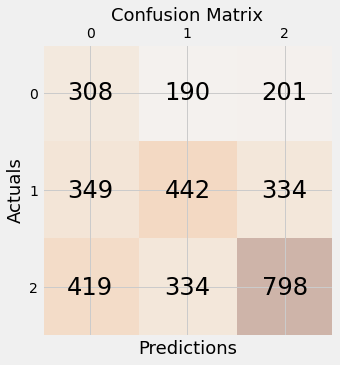

In [612]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [613]:
confusion_M8=pd.crosstab(y_test,y_pred)
confusion_M8



col_0,0,1,2
Label,,,
0,308,190,201
1,349,442,334
2,419,334,798


In [614]:
for i in range(confusion_M8.shape[0]):
    TP=confusion_M8.iloc[i,i].sum()
    FP=confusion_M8.iloc[i,:].sum()-TP
    FN=confusion_M8.iloc[:,i].sum()-TP
    TN=confusion_M8.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M8.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M8.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)


0 0.6565925925925926 0.4406294706723891 0.2862453531598513 0.3470422535211267
1 0.6423703703703704 0.3928888888888889 0.4575569358178054 0.42276422764227645
2 0.6183703703703703 0.5145067698259188 0.5986496624156039 0.5533980582524273


In [615]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2087 WP :  1288


In [616]:
KNN_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
KNN_Report.to_excel('N-GRAM_KNN.xlsx')
KNN_Report

,precision,recall,f1-score,support
0,0.286245,0.440629,0.347042,699.000000
1,0.457557,0.392889,0.422764,1125.000000
2,0.598650,0.514507,0.553398,1551.000000
accuracy,0.458667,0.458667,0.458667,0.458667
macro avg,0.447484,0.449342,0.441068,3375.000000
weighted avg,0.486916,0.458667,0.467115,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**








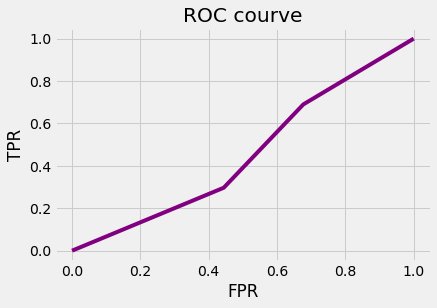

In [617]:


#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()








**PRC Curve**




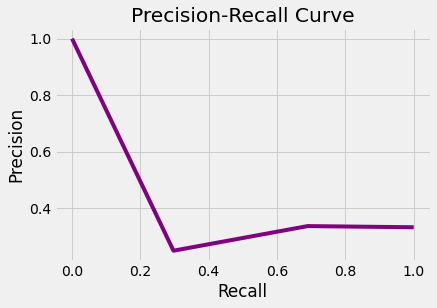

In [618]:



#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



**Model-9 : extra tree classifier (ETC)**

In [619]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='macro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8191746031746032
Validation Accuracy : 0.5134814814814814
f1 score : 0.46921060887797195
Precision Score:  0.47930418310179324
Recall Score:  0.4680173395600297
[[ 230  167  302]
 [ 183  434  508]
 [ 176  306 1069]]


In [620]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222, 0.5582222222222222, 0.3508148148148148, 0.522962962962963, 0.45866666666666667, 0.5134814814814814]


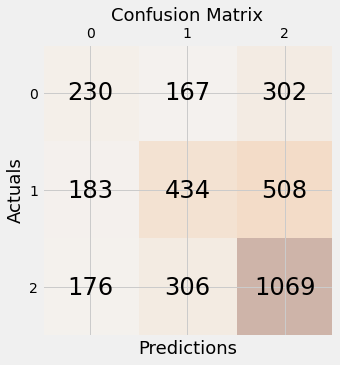

In [621]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




In [622]:

confusion_M9=pd.crosstab(y_test,y_pred)
confusion_M9





col_0,0,1,2
Label,,,
0,230,167,302
1,183,434,508
2,176,306,1069


In [623]:

for i in range(confusion_M9.shape[0]):
    TP=confusion_M9.iloc[i,i].sum()
    FP=confusion_M9.iloc[i,:].sum()-TP
    FN=confusion_M9.iloc[:,i].sum()-TP
    TN=confusion_M9.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M9.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M9.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)






0 0.7546666666666667 0.3290414878397711 0.3904923599320883 0.3571428571428572
1 0.6551111111111111 0.3857777777777778 0.4785005512679162 0.4271653543307087
2 0.6171851851851852 0.6892327530625403 0.5689196381053752 0.6233236151603498


In [624]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2083 WP :  1292


In [625]:

ETC_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
ETC_Report.to_excel('N-GRAM_ETC.xlsx')
ETC_Report




,precision,recall,f1-score,support
0,0.390492,0.329041,0.357143,699.000000
1,0.478501,0.385778,0.427165,1125.000000
2,0.568920,0.689233,0.623324,1551.000000
accuracy,0.513481,0.513481,0.513481,0.513481
macro avg,0.479304,0.468017,0.469211,3375.000000
weighted avg,0.501826,0.513481,0.502809,3375.000000




**ROC Curve- Receiver Operating Characteristics Curve**





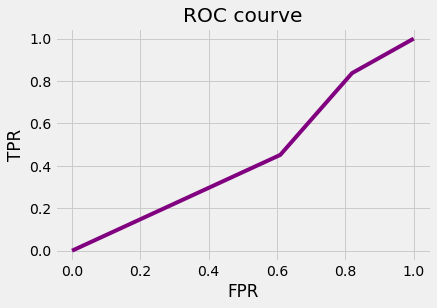

In [626]:





#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()








**PRC Curve**




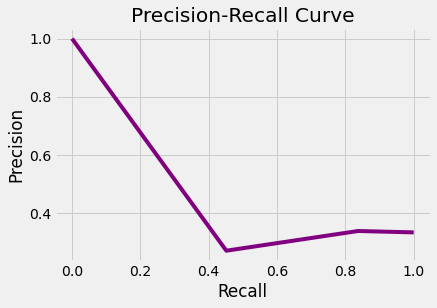

In [627]:



#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()




Model-10 : Stochastic gradient descent (SGD)

In [628]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='macro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.5619047619047619
Validation Accuracy : 0.46785185185185185
f1 score : 0.45335628839313274
Precision Score:  0.4676236160721325
Recall Score:  0.46535313503955633
[[344 171 184]
 [387 441 297]
 [480 277 794]]


In [629]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.5223703703703704, 0.5223703703703704, 0.49333333333333335, 0.5502222222222222, 0.5582222222222222, 0.3508148148148148, 0.522962962962963, 0.45866666666666667, 0.5134814814814814, 0.46785185185185185]


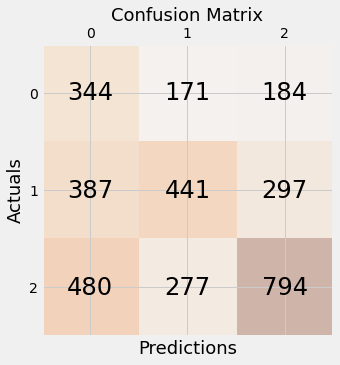

In [630]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [631]:

confusion_M10=pd.crosstab(y_test,y_pred)
confusion_M10

col_0,0,1,2
Label,,,
0,344,171,184
1,387,441,297
2,480,277,794


In [632]:
for i in range(confusion_M10.shape[0]):
    TP=confusion_M10.iloc[i,i].sum()
    FP=confusion_M10.iloc[i,:].sum()-TP
    FN=confusion_M10.iloc[:,i].sum()-TP
    TN=confusion_M10.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M10.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M10.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)






0 0.6379259259259259 0.49213161659513593 0.28406275805119735 0.3602094240837696
1 0.6645925925925926 0.392 0.49606299212598426 0.43793445878848064
2 0.6331851851851852 0.5119277885235332 0.6227450980392157 0.5619249823071479


In [633]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2137 WP :  1238


In [634]:

SGD_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
SGD_Report.to_excel('N-GRAM_SGD.xlsx')
SGD_Report


,precision,recall,f1-score,support
0,0.284063,0.492132,0.360209,699.000000
1,0.496063,0.392000,0.437934,1125.000000
2,0.622745,0.511928,0.561925,1551.000000
accuracy,0.467852,0.467852,0.467852,0.467852
macro avg,0.467624,0.465353,0.453356,3375.000000
weighted avg,0.510373,0.467852,0.478817,3375.000000




**ROC Curve- Receiver Operating Characteristics Curve**






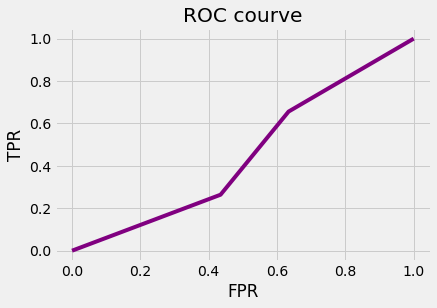

In [635]:






#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()










**PRC Curve**





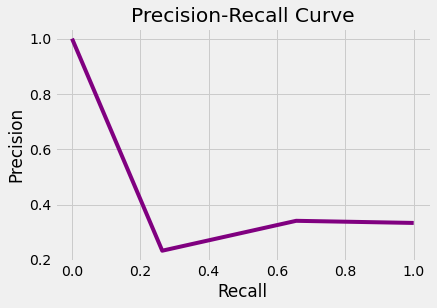

In [636]:




#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



# Data Visualisation

**WordCloud**

In [52]:
from wordcloud import WordCloud

In [107]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
all_words = ' '
stopwords=set(stopwords.words('english'))

for val in dataset.Tweet:

  # typecaste each val to string
  val = str(val)
 
  # split the value
  tokens = val.split()
     
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  allwords =all_words + " ".join(tokens)+" "

    

In [108]:
wordcloud = WordCloud(width = 800,
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(allwords)


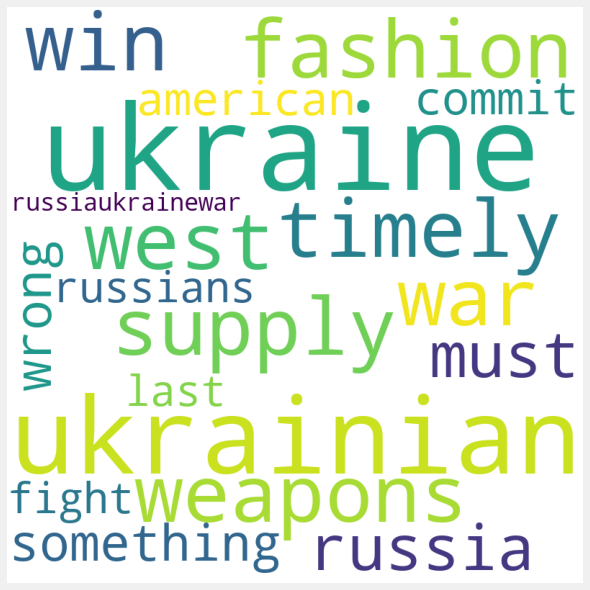

In [109]:
# plot the WordCloud image                      
fig1=plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
fig


In [80]:
dataset

,Unnamed: 0,Date,User,Tweet,Subjectivity,Polarity,Analysis,Label
0,0,2022-06-19 14:39:17+00:00,SuganthanRamak1,for gods sake its their choice putin on ukrain...,0.000000,0.000000,Neutral,2
1,1,2022-06-19 14:38:45+00:00,WilsonShilo,the eu warn that russian action in russiaukrai...,0.050000,0.050000,Positive,1
2,3,2022-06-19 14:37:19+00:00,NasticInc,a russian plane crash near chernihiv ukraine r...,0.133333,0.033333,Positive,1
3,6,2022-06-19 14:35:51+00:00,NasticInc,terror attack catch on cctv footage standwithu...,0.000000,0.000000,Neutral,2
4,7,2022-06-19 14:35:23+00:00,NasticInc,a russian ship burn at port of berdyansk ukrai...,0.000000,0.000000,Neutral,2
...,...,...,...,...,...,...,...,...
11245,24994,2022-05-27 00:11:50+00:00,ichbin_ironhill,russia doesnt kill the 5000 ukrainian pows ukr...,0.333333,0.200000,Positive,1
11246,24995,2022-05-27 00:04:53+00:00,RusskieUkraine,insane footage from ukraine us and uk foreign ...,0.545000,-0.265000,Negative,0
11247,24996,2022-05-27 00:03:51+00:00,Globallpolitics,obesity be the second lead cause of death in t...,0.000000,0.000000,Neutral,2
11248,24997,2022-05-27 00:01:02+00:00,Globallpolitics,list of 6 anti agingfood usa china food antiag...,0.000000,0.000000,Neutral,2


In [140]:
#confusion matrix of table


**Model Comparison using multiple bar chart**

In [527]:
Bow_Model_accuracy=Model_Accuracy
Bow_Model_accuracy

[0.8242962962962963,
 0.72,
 0.7988148148148149,
 0.7425185185185185,
 0.829925925925926,
 0.5914074074074074,
 0.7460740740740741,
 0.5576296296296296,
 0.8317037037037037,
 0.7333333333333333]

In [529]:
print("BOW_Model_accuracy")
for i in range(10):
    print(str.format("{:.2f}",Bow_Model_accuracy[i]))

BOW_Model_accuracy
0.82
0.72
0.80
0.74
0.83
0.59
0.75
0.56
0.83
0.73


In [2]:
BoW_Accuracy=(0.82
,0.72
,0.80
,0.74
,0.83
,0.59
,0.75
,0.56
,0.83
,0.73)
BoW_Accuracy

(0.82, 0.72, 0.8, 0.74, 0.83, 0.59, 0.75, 0.56, 0.83, 0.73)

In [142]:
TF_IDF_Model_accuracy=Model_Accuracy
TF_IDF_Model_accuracy


[0.7721481481481481,
 0.7075555555555556,
 0.7152592592592593,
 0.736,
 0.8142222222222222,
 0.5982222222222222,
 0.7315555555555555,
 0.5137777777777778,
 0.8237037037037037,
 0.7220740740740741]

In [162]:
print("TF_IDF_Model_accuracy")
for i in range(10):
    print(str.format("{:.2f}",TF_IDF_Model_accuracy[i]))

0.77
0.71
0.72
0.74
0.81
0.60
0.73
0.51
0.82
0.72


In [3]:
TF_IDF_Accuracy=(0.77
,0.71
,0.72
,0.74
,0.81
,0.60
,0.73
,0.51
,0.82
,0.72)
TF_IDF_Accuracy

(0.77, 0.71, 0.72, 0.74, 0.81, 0.6, 0.73, 0.51, 0.82, 0.72)

In [637]:
N_gram_Model_accuracy=Model_Accuracy
N_gram_Model_accuracy

[0.5223703703703704,
 0.5223703703703704,
 0.49333333333333335,
 0.5502222222222222,
 0.5582222222222222,
 0.3508148148148148,
 0.522962962962963,
 0.45866666666666667,
 0.5134814814814814,
 0.46785185185185185]

In [642]:
print("N-Gram_Model_accuracy")
for i in range(10):
    print(str.format("{:.2f}",N_gram_Model_accuracy[i]))
    

N-Gram_Model_accuracy
0.52
0.52
0.49
0.55
0.56
0.35
0.52
0.46
0.51
0.47


In [4]:
N_Gram_Accuracy=(0.52
,0.52
,0.49
,0.55
,0.56
,0.35
,0.52
,0.46
,0.51
,0.47
)
N_Gram_Accuracy

(0.52, 0.52, 0.49, 0.55, 0.56, 0.35, 0.52, 0.46, 0.51, 0.47)

In [643]:
N_gram_Model_accuracy

[0.5223703703703704,
 0.5223703703703704,
 0.49333333333333335,
 0.5502222222222222,
 0.5582222222222222,
 0.3508148148148148,
 0.522962962962963,
 0.45866666666666667,
 0.5134814814814814,
 0.46785185185185185,
 '0.52',
 '0.52',
 '0.49',
 '0.55',
 '0.56',
 '0.35',
 '0.52',
 '0.46',
 '0.51',
 '0.47']

In [5]:
print("BOW Model Accuracy of 10 model \n",BoW_Accuracy)

BOW Model Accuracy of 10 model 
 (0.82, 0.72, 0.8, 0.74, 0.83, 0.59, 0.75, 0.56, 0.83, 0.73)


In [6]:
print("TF-IDF Model Accuracy of 10 model \n",TF_IDF_Accuracy)

TF-IDF Model Accuracy of 10 model 
 (0.77, 0.71, 0.72, 0.74, 0.81, 0.6, 0.73, 0.51, 0.82, 0.72)


In [7]:
print("N-Gram Model Accuracy of 10 model \n",N_Gram_Accuracy)

N-Gram Model Accuracy of 10 model 
 (0.52, 0.52, 0.49, 0.55, 0.56, 0.35, 0.52, 0.46, 0.51, 0.47)


In [8]:
models=["RF","LR","DT","SVM","XGB","GNB","ADA","KNN","ETC","SGD"]
BOW= BoW_Accuracy
TF_IDF=TF_IDF_Accuracy
N_gram=N_Gram_Accuracy

[0 1 2 3 4 5 6 7 8 9]
[0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2, 9.2]
[0.4, 1.4, 2.4000000000000004, 3.4000000000000004, 4.4, 5.4, 6.4, 7.4, 8.399999999999999, 9.399999999999999]


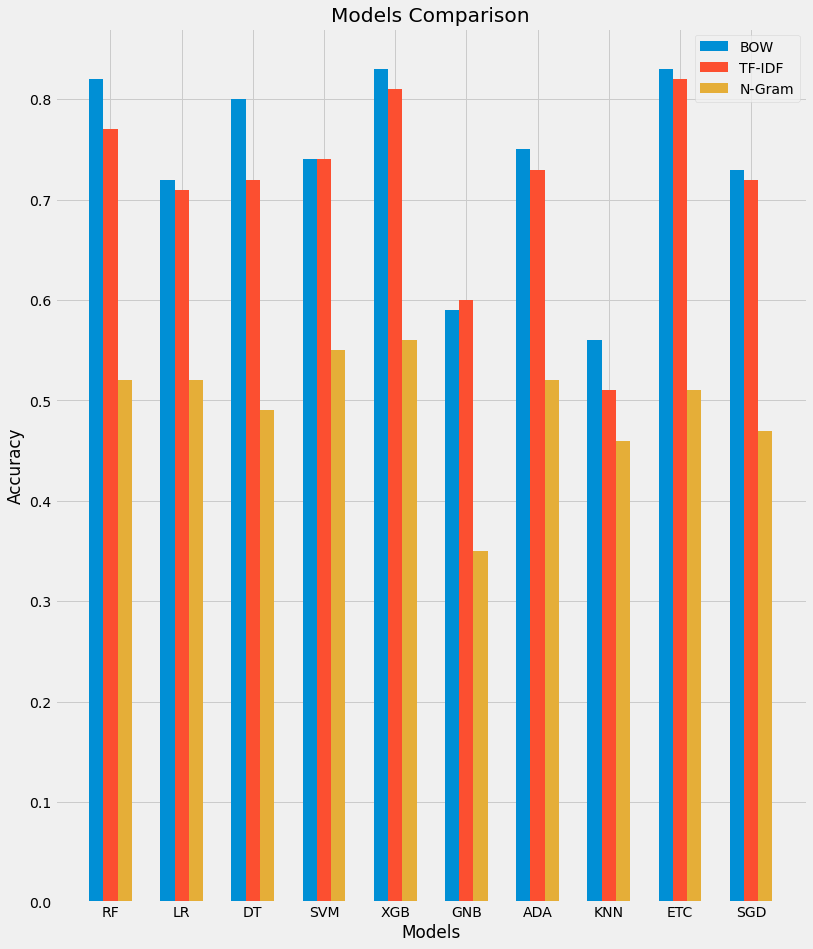

In [27]:
w=0.2
fig1=plt.figure(figsize=(12,15))
bow_bar=np.arange(len(models))
tf_idf_bar=[i+w for  i in bow_bar]
n_gram_bar=[i+w for i in tf_idf_bar]

print(bow_bar)
plt.bar(bow_bar,BOW,width=w,label="BOW")
print(tf_idf_bar)
plt.bar(tf_idf_bar,TF_IDF,width=w,label="TF-IDF")
print(n_gram_bar)
plt.bar(n_gram_bar,N_gram,width=w,label="N-Gram")

plt.xticks(tf_idf_bar,models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Comparison")
plt.legend()
plt.show()

fig1.savefig('Model Comparison.jpg')

Neutral     5100
Positive    3739
Negative    2411
Name: Analysis, dtype: int64


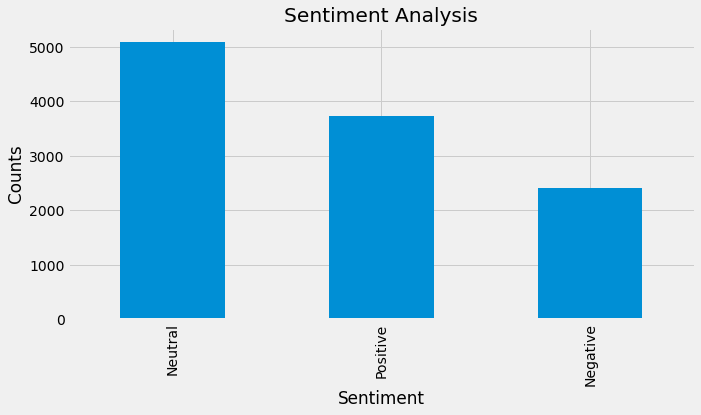

In [655]:
#show the value counts
print(dataset['Analysis'].value_counts())

#Plot and Visualize the counts
fig2=plt.figure(figsize=(10,5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['Analysis'].value_counts().plot(kind='bar',width=0.5)
plt.show()

plt.show()
fig2.savefig('Sentiment Analysis.jpg')